### Import your librares

In [8]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load your dataset

In [9]:
df = pd.read_csv('seattle_weather.csv')
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


### Handle missing data in PRCP and RAIN columns

In [10]:
df.isnull().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [11]:
df[df['PRCP'].isnull() == True]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [12]:


df['PRCP'].fillna(method='bfill', inplace=True)
df['RAIN'].fillna(method='bfill', inplace=True)

# Print to check for null values
df[df['PRCP'].isnull() == True] 

,DATE,PRCP,TMAX,TMIN,RAIN


### Repeat the following steps for each column within outliers

* Visualize the outliers
* Detect if your data set contains any outliers
* Identify lower & higher limit of outliers
* Drop all outliers
* Visualize the column after processing


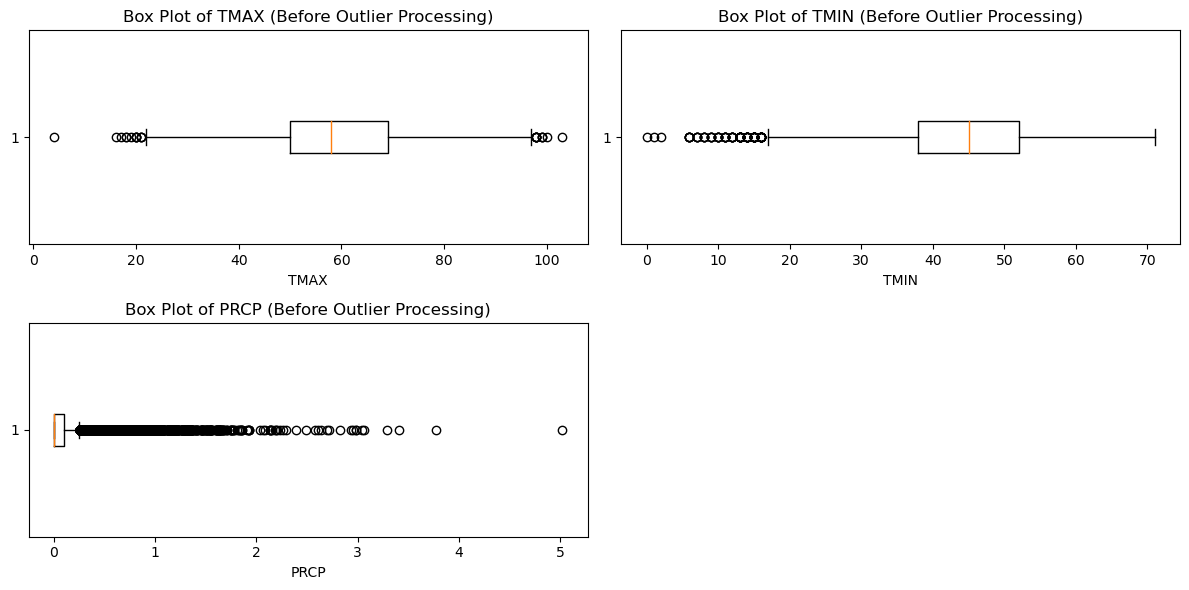

In [13]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.boxplot(df['TMAX'], vert=False)
plt.title('Box Plot of TMAX (Before Outlier Processing)')
plt.xlabel('TMAX')

plt.subplot(2, 2, 2)
plt.boxplot(df['TMIN'], vert=False)
plt.title('Box Plot of TMIN (Before Outlier Processing)')
plt.xlabel('TMIN')

plt.subplot(2, 2, 3)
plt.boxplot(df['PRCP'], vert=False)
plt.title('Box Plot of PRCP (Before Outlier Processing)')
plt.xlabel('PRCP')


plt.tight_layout()
plt.show()

In [14]:
Q1_prcp = df['PRCP'].quantile(0.25)
Q3_prcp = df['PRCP'].quantile(0.75)
IQR_prcp = Q3_prcp - Q1_prcp
lower_limit_prcp = Q1_prcp - 1.5 * IQR_prcp
upper_limit_prcp = Q3_prcp + 1.5 * IQR_prcp

Q1_tmax = df['TMAX'].quantile(0.25)
Q3_tmax = df['TMAX'].quantile(0.75)
IQR_tmax = Q3_tmax - Q1_tmax
lower_limit_tmax = Q1_tmax - 1.5 * IQR_tmax
upper_limit_tmax = Q3_tmax + 1.5 * IQR_tmax

Q1_tmin = df['TMIN'].quantile(0.25)
Q3_tmin = df['TMIN'].quantile(0.75)
IQR_tmin = Q3_tmin - Q1_tmin
lower_limit_tmin = Q1_tmin - 1.5 * IQR_tmin
upper_limit_tmin = Q3_tmin + 1.5 * IQR_tmin

In [17]:
print("PRCP:")
print(f"Lower limit for outliers: {lower_limit_prcp}")
print(f"Upper limit for outliers: {upper_limit_prcp}")
print()

print("TMAX:")
print(f"Lower limit for outliers: {lower_limit_tmax}")
print(f"Upper limit for outliers: {upper_limit_tmax}")
print()

print("TMIN:")
print(f"Lower limit for outliers: {lower_limit_tmin}")
print(f"Upper limit for outliers: {upper_limit_tmin}")
print()

PRCP:
Lower limit for outliers: -0.15000000000000002
Upper limit for outliers: 0.25

TMAX:
Lower limit for outliers: 21.5
Upper limit for outliers: 97.5

TMIN:
Lower limit for outliers: 17.0
Upper limit for outliers: 73.0



In [15]:
df = df[(df['PRCP'] >= lower_limit_prcp) & (df['PRCP'] <= upper_limit_prcp)]
df = df[(df['TMAX'] >= lower_limit_tmax) & (df['TMAX'] <= upper_limit_tmax)]
df = df[(df['TMIN'] >= lower_limit_tmin) & (df['TMIN'] <= upper_limit_tmin)]


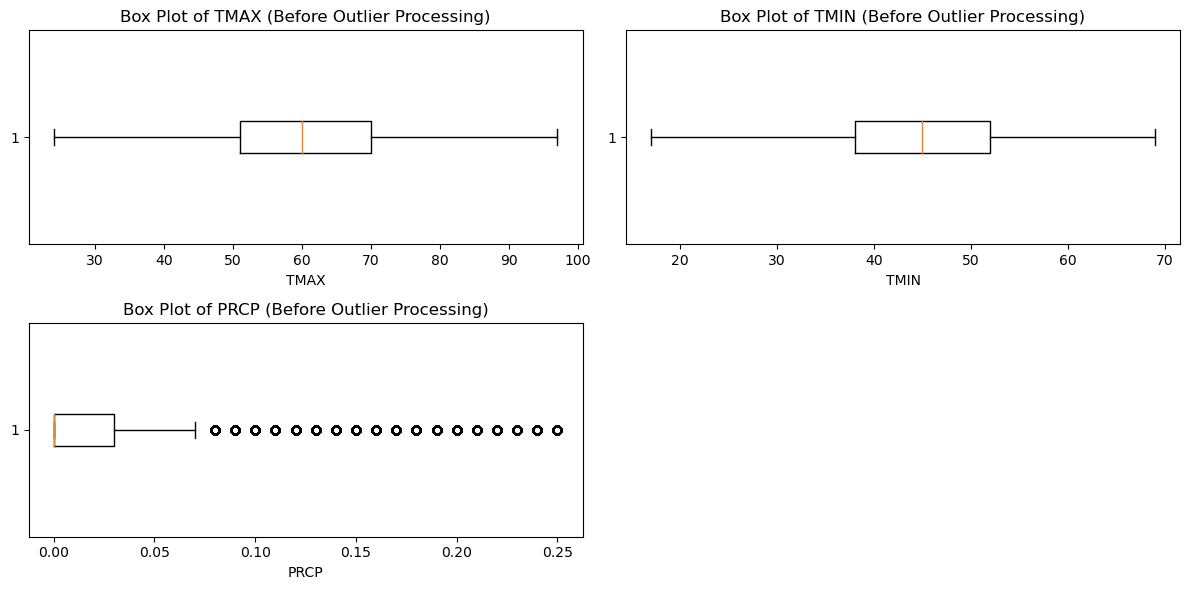

In [16]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.boxplot(df['TMAX'], vert=False)
plt.title('Box Plot of TMAX (Before Outlier Processing)')
plt.xlabel('TMAX')

plt.subplot(2, 2, 2)
plt.boxplot(df['TMIN'], vert=False)
plt.title('Box Plot of TMIN (Before Outlier Processing)')
plt.xlabel('TMIN')

plt.subplot(2, 2, 3)
plt.boxplot(df['PRCP'], vert=False)
plt.title('Box Plot of PRCP (Before Outlier Processing)')
plt.xlabel('PRCP')


plt.tight_layout()
plt.show()